In [138]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rnd
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## **0**

Börjar med att sätta lite variabler till var programmet körs och var datan finns

In [139]:
relative_path = os.path.abspath("")
original_data_train_path = os.path.join(relative_path, "original_data", "train", "train")
original_data_test_path = os.path.join(relative_path, "original_data", "test", "test")

print(f"{relative_path=}")
print(f"{original_data_train_path=}")

relative_path='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab'
original_data_train_path='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/original_data/train/train'


**b)**

Sparar alla filnamn från test-datamappen i en lista och samplar 10 namn slumpmässigt från denna lista.

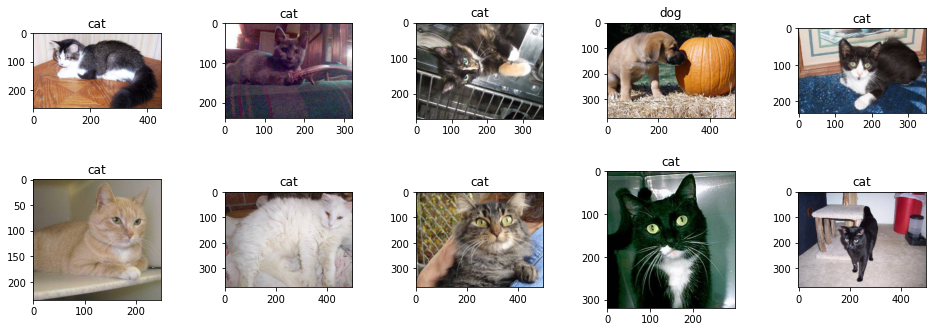

In [140]:
rnd.seed(42)

image_names = os.listdir(original_data_train_path)

fig, axes = plt.subplots(2, 5, figsize = (16, 8))

for ax, image_name in zip(axes.flatten(), rnd.sample(image_names, 10)):
    image = plt.imread(f"{original_data_train_path}{os.sep}{image_name}")
    ax.imshow(image)
    ax.set_title(image_name.split(".")[0])

plt.subplots_adjust(wspace = 0.5, hspace = -0.5, bottom = 0)
plt.show()

**c)**

Eftersom båda dataseten ska innehålla samma undermappar så tänkte jag att det var lämpligt att for-loopa fram mappstrukturen.

In [141]:
parents = ["experiment_small_data", "experiment_tiny_data"]
children = ["train", "val", "test"]

for parent in parents:
    try:
        os.mkdir(f"{relative_path}{os.sep}{parent}")
    except FileExistsError as err:
        print(err)
    for child in children:
        try:
            os.mkdir(f"{relative_path}{os.sep}{parent}{os.sep}{child}")
        except FileExistsError as err:
            print(err)

[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data/train'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data/val'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data/test'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data/train'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data/val'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data/test'


**d)**

Jag tänkte att det kunde vara roligt att slippa tänka på hur balanserade dataseten blir så jag skapade en funktion som tar N/2 katter och N/2 hundar slumpmässigt ur en lista med filnamn. Funktionen returnerar listan utan dessa filnamn för att åstadkomma kriteriet *utan återläggning*. Sen körs funktionen i en loop över de olika mapparna med respektive antal bilder. 

In [142]:
import shutil

def get_label(filename):
    return filename.split(".")[0]

def get_cats_dogs(filenames, n):
    cats, dogs = [], []
    files_to_move = []

    for filename in filenames:
        if get_label(filename) == "cat":
            cats.append(filename)
        else:
            dogs.append(filename)
    
    files_to_move += rnd.sample(dogs, n // 2) + rnd.sample(cats, n // 2)

    return files_to_move


def move_files(filenames, n, source, target):
    files_to_move = get_cats_dogs(filenames, n)

    for filename in files_to_move:
        shutil.copy(f"{source}{os.sep}{filename}", f"{target}{os.sep}{filename}")

    for filename in files_to_move:
        filenames.remove(filename)

    return filenames


train_images_list = os.listdir(original_data_train_path)
number_of_files = [1600, 400, 500, 160, 40, 50]
targets = [f"{parent}{os.sep}{child}" for parent in parents for child in children]

for n, target in zip(number_of_files, targets):
        train_images_list = move_files(train_images_list, n, original_data_train_path, f"{relative_path}{os.sep}{target}")

for path in targets:
    print(f"Files in {path}: {len(os.listdir(path))}")


Files in experiment_small_data/train: 1600
Files in experiment_small_data/val: 400
Files in experiment_small_data/test: 500
Files in experiment_tiny_data/train: 160
Files in experiment_tiny_data/val: 40
Files in experiment_tiny_data/test: 50


**e)**

Eftersom vi har två dataset uppdelade train, validation och test så täntke jag spara allt i en dict för att det ska vara lättåtkomligt. Labels hämtas med get_label() från tidigare kodstycke. Listan över bilderna blandas och sen läses bilderna med i varje dataset in i images och labels.

In [143]:
rnd.seed(42)

images = {}
labels = {}

datasets = [target[11:].replace("_data/", "_") for target in targets]

for dataset, path in zip(datasets, targets):
    file_list = os.listdir(f"{relative_path}{os.sep}{path}")
    rnd.shuffle(file_list)
    images[dataset] = []
    labels[dataset] = []

    for file in file_list:
        images[dataset] += [plt.imread(f"{relative_path}{os.sep}{path}{os.sep}{file}")]
        labels[dataset] += [get_label(file)]
    
    labels[dataset] = np.array([1 if label == "cat" else 0 for label in labels[dataset]])

Fem bilder ur varje dataset/underset skrivs ut tillsamans med label. 0 är hund och 1 är katt, och det verkar stämma!

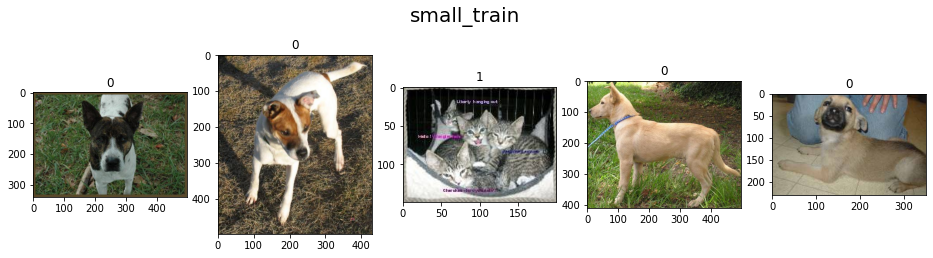

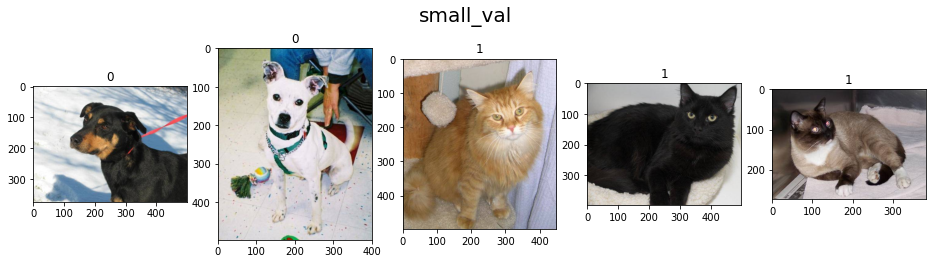

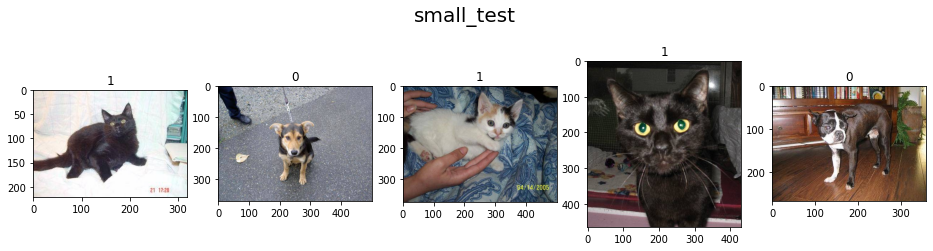

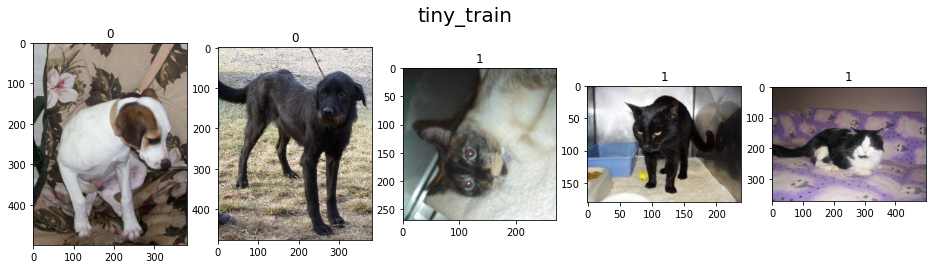

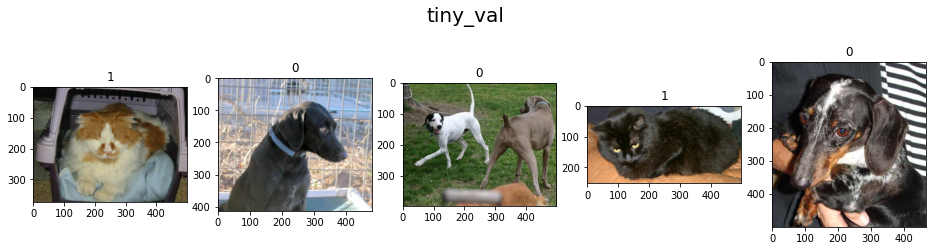

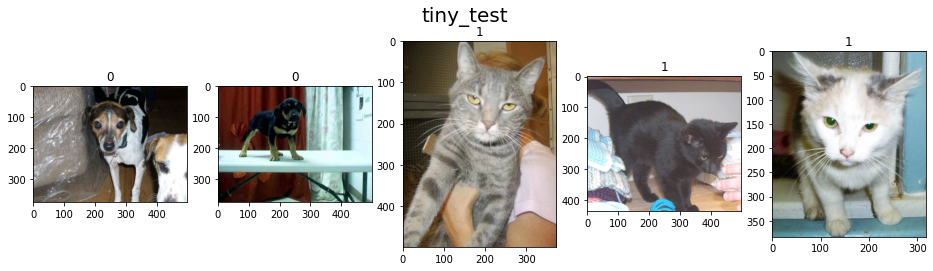

In [144]:
rnd.seed(42)

def plot_five_images(images, labels = None, suptitle = None):
    fig, axes = plt.subplots(1, 5, figsize = (16, 4))

    for i, (ax, image) in enumerate(zip(axes.flatten(), images[:5])):
        ax.imshow(image)

        if isinstance(labels, np.ndarray):
            ax.set_title(labels[i])
    
    if suptitle:
        fig.suptitle(suptitle, fontsize = 20)
    
    plt.show()

for dataset in datasets:
    plot_five_images(images[dataset], labels = labels[dataset], suptitle = dataset)

Ja, det ser ganska balanserat ut

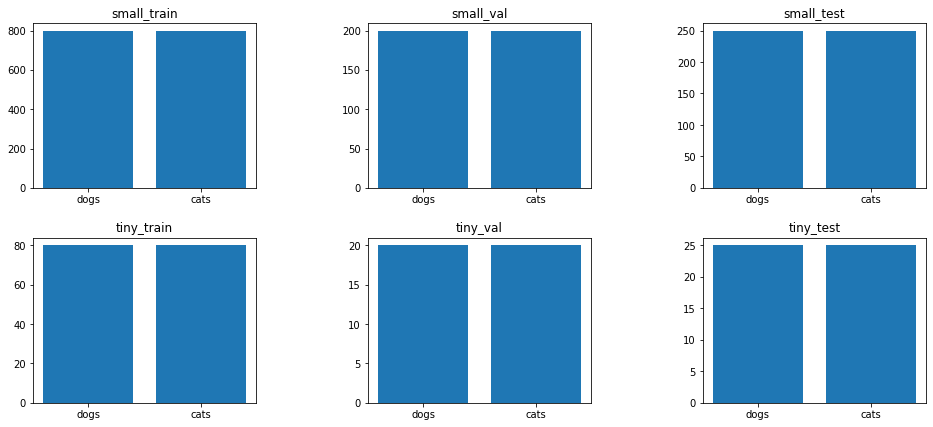

In [145]:
fig, axes = plt.subplots(2, 3, figsize = (16, 6))

for ax, dataset in zip(axes.flatten(), datasets):
    labels_, count = np.unique(labels[dataset], return_counts = True)
    ax.bar(labels_, count)
    ax.set_xticks(labels_)
    ax.set_xticklabels(["cats", "dogs"][::-1]) # hehe ...
    ax.set_title(dataset)

plt.subplots_adjust(wspace = 0.5, hspace = 0.3, bottom = 0)
plt.show()

Här blev jag lite osäker på hur jag skulle plotta detta, men: 

Labels är {0, 1} så 0,5 subtraheras från dem så att de blir {-0,5, 0,5}, sen summeras labelslistan kumulativt och plottas. Skulle exempelvis alla katter (label 1) hamnat längst bak i listan så skulle en nedgång ses i början och en uppgång i slutet. Nu ser trenden ut att vara slumpmässig med uppgångar och nedgångar hursomhelst, min slutsats är att de är slumpmässigt fördelade dataset.

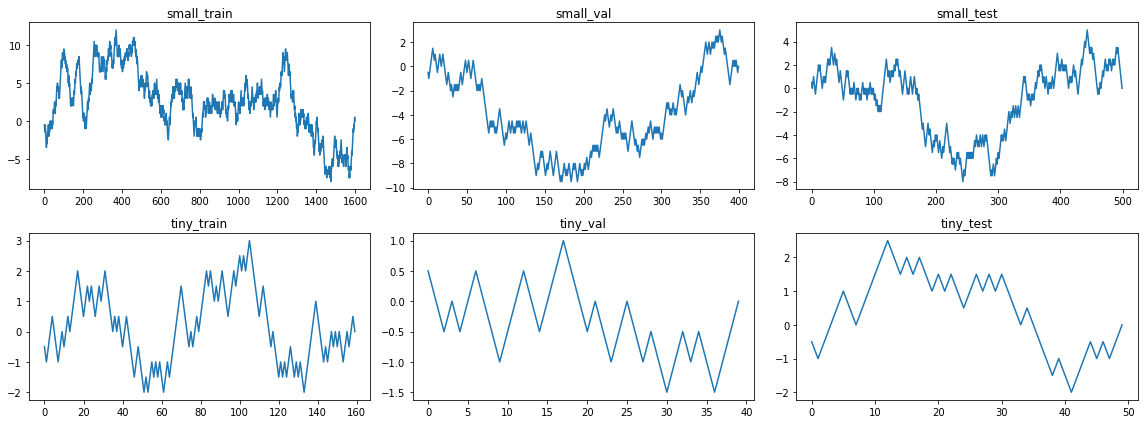

In [146]:
fig, axes = plt.subplots(2, len(datasets) // 2, figsize = (16, 6))

for ax, dataset in zip(axes.flatten(), datasets):
    ax.plot(np.cumsum(labels[dataset] - 0.5))
    ax.set_title(dataset)

fig.tight_layout()
plt.show()


## **1**

**a)**

Här plottas både en jointplot över storlekarna samt en kurva över aspect ratio. Bildernas storlek/förhållande skiljer sig ganska mycket åt men jag tror inte det kommer påverka jättemycket. Egentligen skulle jag vilja slänga bort dem med kraftigt avvikande bredd/höjd-förhållande, men samtidigt är de relativt få så det har nog inte så stor betydelse. 

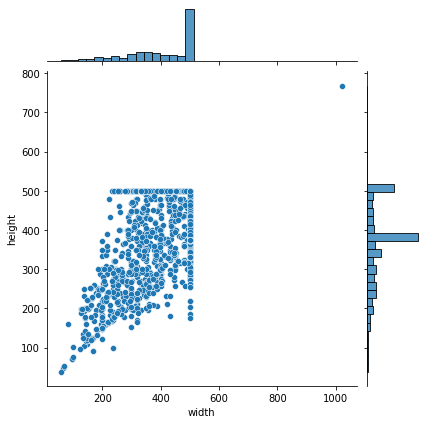

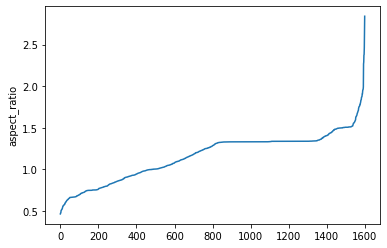

In [147]:
# [0] höjd, [1] bredd
image_heights = [image.shape[0] for image in images[datasets[0]]]
image_widths = [image.shape[1] for image in images[datasets[0]]]
image_labels = [label for label in labels[datasets[0]]]

df_dim = pd.DataFrame({"height": image_heights, "width": image_widths, "label": image_labels})

df_dim["aspect_ratio"] = df_dim["width"] / df_dim["height"]

sns.jointplot(data = df_dim, x = "width", y = "height")
plt.show()
sns.lineplot(data = df_dim.sort_values(by = "aspect_ratio").reset_index(), x = df_dim.index, y = "aspect_ratio")
plt.show()


**b)**

128 x 128 pixlar verkar vara lagom storlek, då blir det få bilder som behöver sträckas ut men det känns ändå överkompligt beräkningsmässigt.

För att förhindra att bilderna blir ihoptryckta eller utdragna beskärs bilderna först till en kvadrat innan storleken ändras. Innan varje set skickas till plot-funktionen görs de om till en numpy-array och dimensionen på denna hamnar i titeln för varje plot.

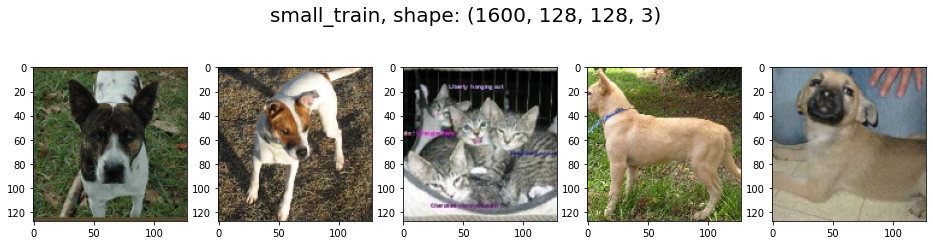

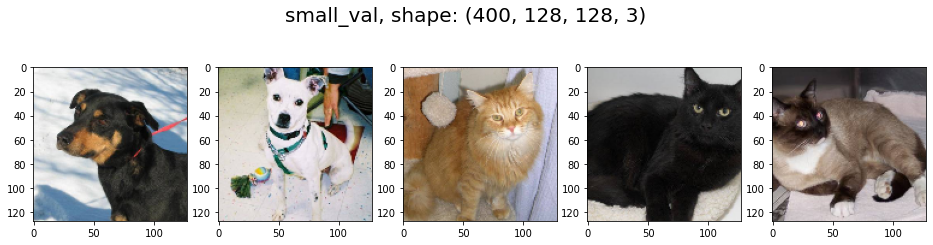

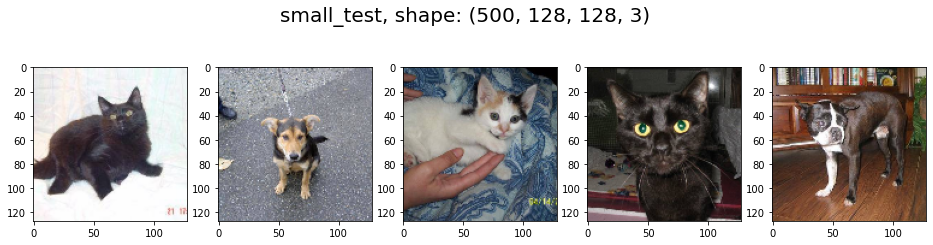

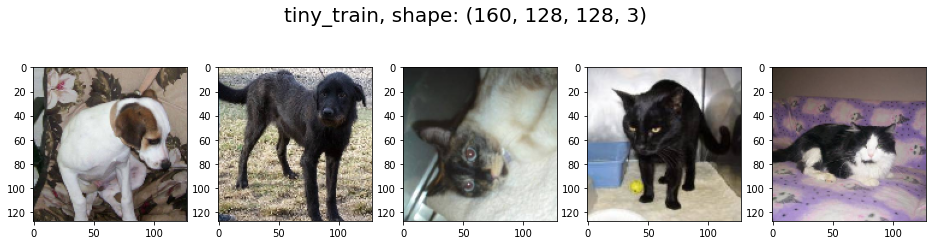

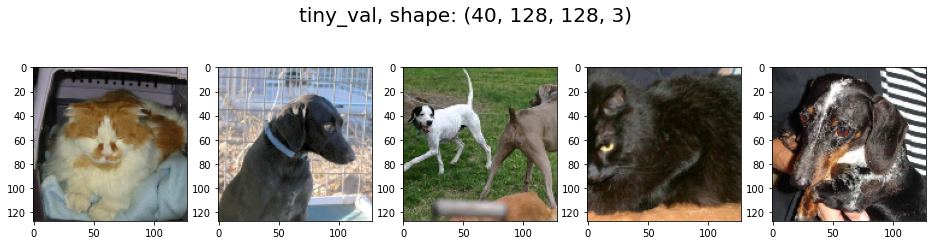

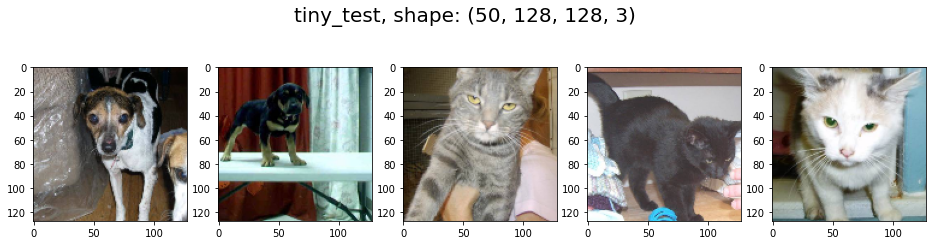

In [148]:
def square_image_crop(image, side = None):
    height, width = image.shape[:2]
    
    if height < width and height + 1 < width:
        x = (width - height) // 2
        image = image[:,x:-x]
    elif height > width and height - 1 > width:
        y = (height - width) // 2
        image = image[y:-y,:]

    if side == None:
        return image
        
    return cv2.resize(image, (side, side))

def square_image_padding(image, side = None):
    height, width = image.shape[:2]

    if image.shape[0] > image.shape[1] + 1:
        fill_width = (image.shape[0] - image.shape[1]) // 2
        fill_height = image.shape[0]
        fill = np.zeros((fill_height, fill_width, image.shape[2])).astype("int8")
        image = np.concatenate([fill, image, fill], axis = 1)
    

    elif image.shape[1] > image.shape[0] + 1:
        fill_width = (image.shape[1] - image.shape[0]) // 2
        fill_height = image.shape[1]
        fill = np.zeros((fill_width, fill_height, image.shape[2])).astype("int8")
        image = np.concatenate([fill, image, fill], axis = 0)

    if side == None:
        return image
        
    return cv2.resize(image, (side, side))
    
sets = datasets

for set in sets:
    for i, image in enumerate(images[set]):
        images[set][i] = square_image_crop(images[set][i], side = 128)
    images[set] = np.array(images[set]) #.astype("float32") / 255
    plot_five_images(images[set][:5], suptitle = f"{set}, shape: {images[set].shape}")


**d)**

ImageDataGenerator används för att augmentera datan. För att få en viss uppfattning om hur bilderna förändras plottas några testbilder. Efter lite laborerande tänkte jag att bilder på djur troligtvis inte är lika "känsliga" som siffror i MNIST där jag fick bättre resultat med ganska mycket lägre värden, men här valde jag ändå hyfsat galna värden. Rotation var klurigast att bestämma men jag tror ändå 90 grader inte är till någon nackdel. Horizontal flip satt till True bör påverka möjligheterna att klassificera bilder tagna från sidan i positiv riktning.

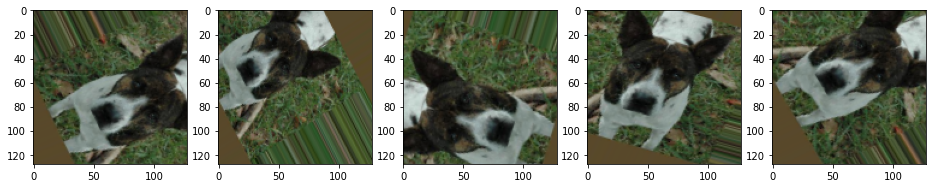

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
    rotation_range = 90,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = "nearest",
)

do_nothing_image_generator = ImageDataGenerator()

plot_generator = train_image_generator.flow(images["small_train"][0:1], labels["small_train"][0:1], batch_size = 1)
plot_five_images([plot_generator.next()[0][0] for _ in range(5)])

## **2**

Börjar med att samla några funktioner som kan vara användbara vid evalueringen

In [13]:
def plot_metrics(model, val = True):
    metrics = pd.DataFrame(model.history.history)
    _, ax = plt.subplots(1, 2, figsize = (12, 4))
    if val:
        metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
        metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)
    else:
        metrics[["loss"]].plot(ax = ax[0], grid = True)
        metrics[["acc"]].plot(ax = ax[1], grid = True)

def plot_scoring(y_true, y_pred):
    print(classification_report(y_true, (y_pred > 0.5) * 1))
    cm = confusion_matrix(y_true, (y_pred > 0.5) * 1)
    ConfusionMatrixDisplay(cm).plot()

def plot_scoring_all(model, X, y_true):
    metrics = pd.DataFrame(model.history.history)
    y_pred = model.predict(X)
    y_pred = (y_pred > 0.5) * 1

    fig, ax = plt.subplots(1, 3, figsize = (16, 4))
    
    metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)
    
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot = True, fmt = "g", cmap = "viridis", ax = ax[2])
    ax[2].set_xlabel("Predicted values")
    ax[2].set_ylabel("True values")
    ax[2].set_title(f"Accuracy: {np.sum(y_true == y_pred.ravel()) / len(y_pred)}")
    plt.show()

def fit_eval(traindata, modelargs = None, fitargs = None):
    model = CNN_model(**modelargs)
    model.fit(*traindata, **fitargs),
    plot_scoring_all(model, X_val, y_val)

**a)** 

För att enklare kunna evaluera olika parametrar skapade jag en funktion liknande vad vi har gjort tidigare

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop

def CNN_model(conv_size = [3, 3], conv_kernels = [32, 64, 128, 128], dense_layers = [512], dropout_rate = 0.3, optimizer = Adam(learning_rate = 0.001)):
    model = Sequential(name = "cnn")

    for kernels in conv_kernels:
        model.add(Conv2D(
            kernels,
            kernel_size = conv_size,
            activation = "relu",
            kernel_initializer = "he_normal",
            input_shape = X_train.shape[1:],
        ))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
    
    model.add(Flatten())

    for nodes in dense_layers:
        model.add(Dropout(dropout_rate))
        model.add(Dense(nodes, activation = "relu"))

    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["acc"])

    return model

Först kör vi på dataset "small". Jag har valt att inte köra med early_stopping för jag tycker att den stoppar för tidigt eller också stoppar den inte alls. Speciellt när jag har testkört med augmenterad data tycker jag att trots patience satt till 10 så kan jag fortsätta träna nätet med bättre validation accuracy som resultat, och då känns det ju inte som att man får ut maximalt av tränandet. Det känns som man sitter och hyperparameter-tunar early_stoppern för varje ändring i stället för att lägga tid på att tuna nätet.

Det kanske finns något bombsäkert sätt att använda early_stoppern men inte vad jag har kunnat hitta.

In [20]:
X_train = images["small_train"]
X_val = images["small_val"]
X_test = images["small_test"]
y_train = labels["small_train"]
y_val = labels["small_val"]
y_test = labels["small_test"]

Grundutförande

Resultat: 0.7 i accuracy, efter cirka 10 epoker börjar vi få overfitting

2022-05-02 21:37:16.479398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 21:37:20.073234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 21:38:24.232302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


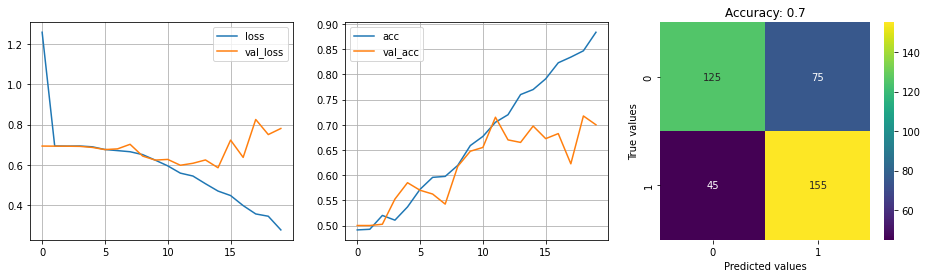

In [56]:
fit_eval((X_train, y_train),
    modelargs = dict(
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 20,
        verbose = 0
))

Ett steg för att göra modellen bättre på att generalisera kan vara att öka dropout

Resultat: Mindre overfitting, men tyvärr är modellen klart sämre även efter 40 epoker. Ett dropoutlager på 0.6 kanske var för mycket.

2022-05-02 21:47:34.294932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 21:47:37.811332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 21:49:54.215912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


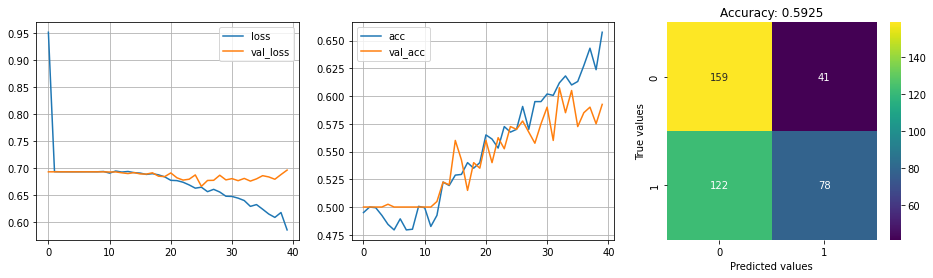

In [58]:
fit_eval((X_train, y_train),
    modelargs = dict(
        dropout_rate = 0.6
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 40,
        verbose = 0
))

Vi provar med lägre learning rate

Resultat: Lika illa, men modellen verkar hitta sitt optimum efter bara 5 epoker, sen blir den inte bättre.

2022-05-02 21:58:54.411143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 21:58:57.931249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:01:10.256992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


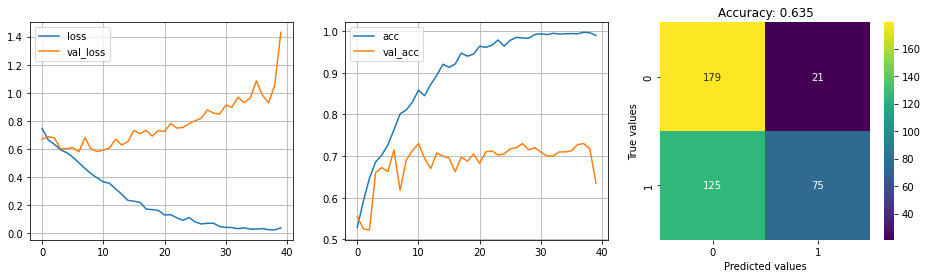

In [61]:
fit_eval((X_train, y_train),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.0001),
        dropout_rate = 0.3
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 40,
        verbose = 0
))

Högre learning rate

Resultat: Modellen lyckades inte lära sig någonting

2022-05-02 22:03:29.273285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:03:32.821598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:05:43.688119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


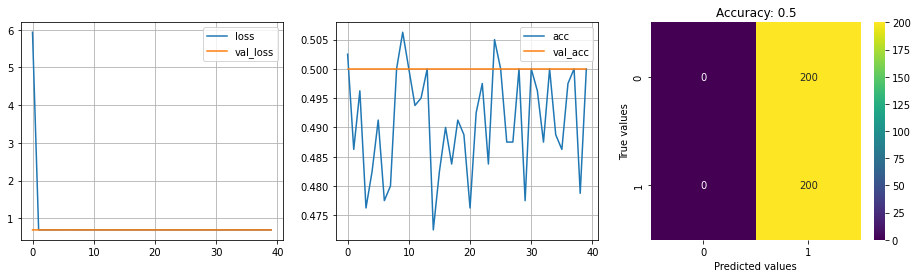

In [62]:
fit_eval((X_train, y_train),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.01),
        dropout_rate = 0.3
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 40,
        verbose = 0
))

Vi testar att lägga till ett extra Dense med 256 noder, samt öka antalet kernels till 256 i sista convolutional.

Resultat: Det gick åt pipan. Det känns som nätet i grundutförande är ganska bra.

2022-05-02 22:20:26.645806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:20:30.827170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:21:41.492149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


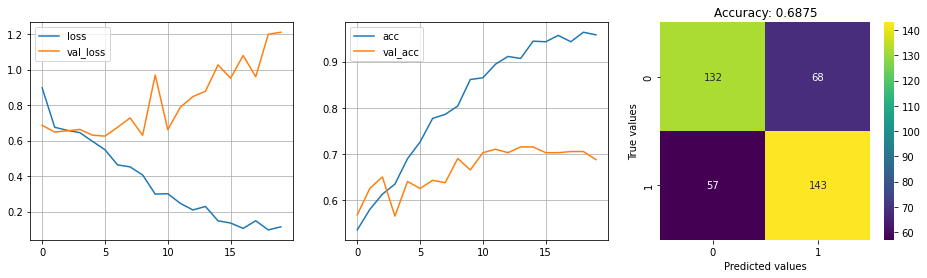

In [63]:
fit_eval((X_train, y_train),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.001),
        dropout_rate = 0.3,
        conv_kernels = [32, 64, 128, 256],
        dense_layers = [512, 256]
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 20,
        verbose = 0
))

In [21]:
BATCH_SIZE = 32

train_generator = train_image_generator.flow(X_train, y_train, batch_size = BATCH_SIZE)
val_generator = do_nothing_image_generator.flow(X_val, y_val, batch_size = BATCH_SIZE)

steps_per_epoch = int(len(X_train) / BATCH_SIZE)
validation_steps = int(len(X_val) / BATCH_SIZE)

steps_per_epoch, validation_steps

(50, 12)

Nu får vi prova på den augmenterade datan. Vi börjar med nätet i grundutförande

Resultat: Det verkar hoppa upp och ned väldigt mycket

2022-05-02 22:24:18.442072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:24:22.056640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:25:26.845626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


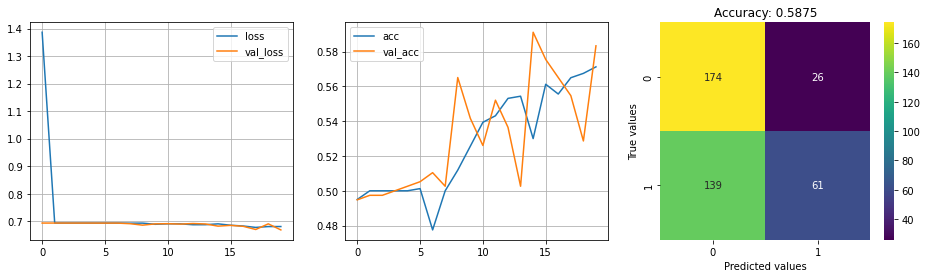

In [65]:
fit_eval((train_generator, None),
    modelargs = dict(
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 20,
        verbose = 0
))

Jag misstänker att learning raten var för hög så vi testar att sänka den.

Resultat: Det ser bättre ut men nätet ser inte färdigtränat ut.

2022-05-02 22:27:26.606521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:27:30.175363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:28:35.405249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


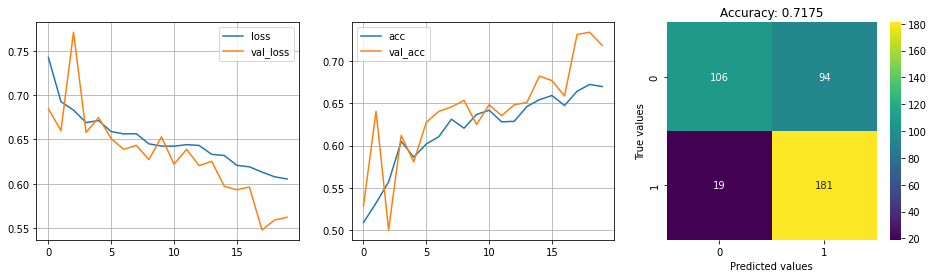

In [66]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.0001),
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 20,
        verbose = 0
))

Provar med 100 epoker fast samma inställningar.

Resultat: Modellen ser forfarande inte färdigtränad ut, inte heller har vi några problem med overfitting men resultaten varierar ganska kraftigt.

2022-05-02 22:29:57.457639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:30:01.038940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:37:38.172807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


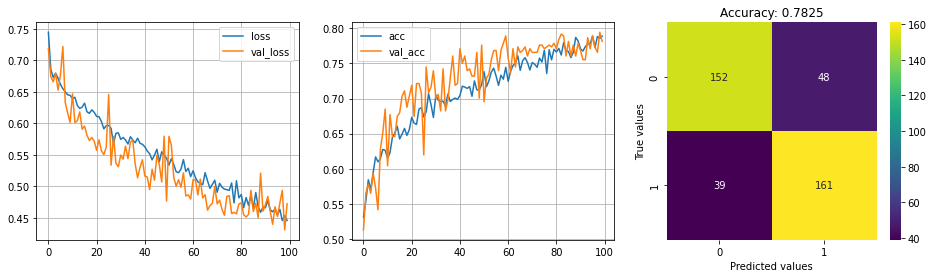

In [67]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.0001),
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

Eftersom svajigheten inte verkade bli bättre med lägre learning rate så sänker vi den igen.

Resultat: Klart bättre, fortfarande ser validation accuracy ut att gå upp. Jag ska senare prova fler epoker men först...

2022-05-02 22:39:58.120015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:40:01.788586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:49:25.842148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


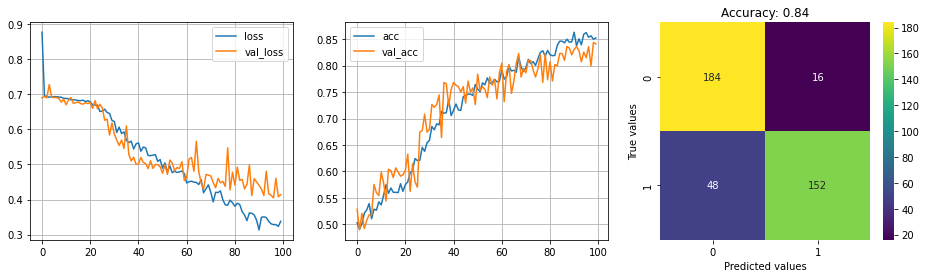

In [68]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.001),
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

... ska vi testa en annan Optimizer.

Resultat: Mer overfitting, sämre på att generalisera

2022-05-02 22:52:01.757418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 22:52:06.569322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 23:01:37.138941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


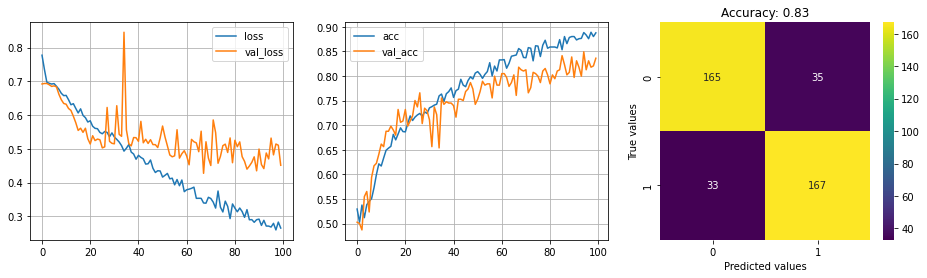

In [69]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Nadam(learning_rate = 0.001),
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

2022-05-03 08:10:38.054003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 08:10:42.126367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 08:18:14.707206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


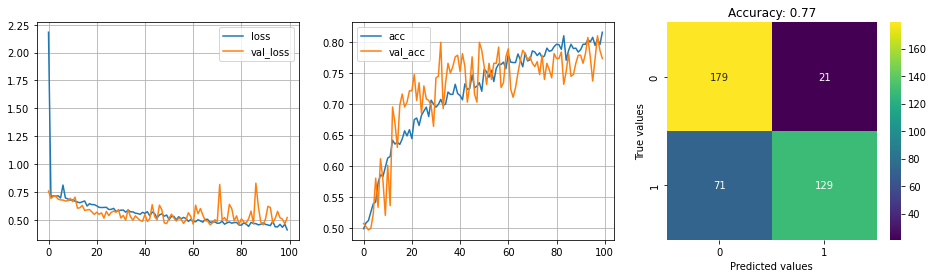

In [73]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = RMSprop(learning_rate = 0.001),
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

Nu ska vi prova lite fler hidden layers i nätverket och några enheter högre dropout.

Resultat: Jag tycker inte att vi kan se några tecken på overfitting än, så jag får testa 150 epoker...

2022-05-03 09:06:53.740150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 09:06:57.484057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 09:14:11.419099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


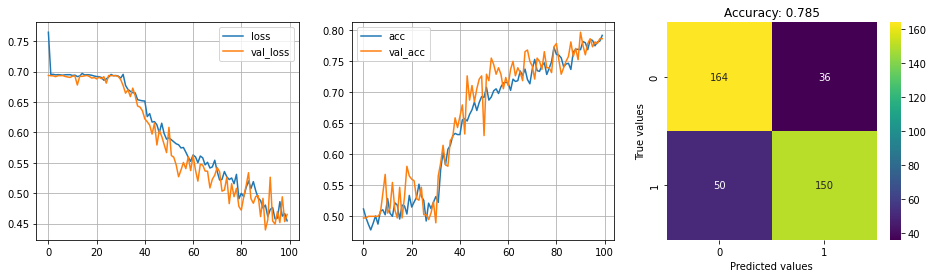

In [75]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.001),
        dense_layers = [512, 256, 128],
        dropout_rate = 0.5
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

150 epoker, samma inställningar som förut...

Resultat: Overfitting.

2022-05-03 09:16:15.758766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 09:16:19.944912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 09:31:59.046010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


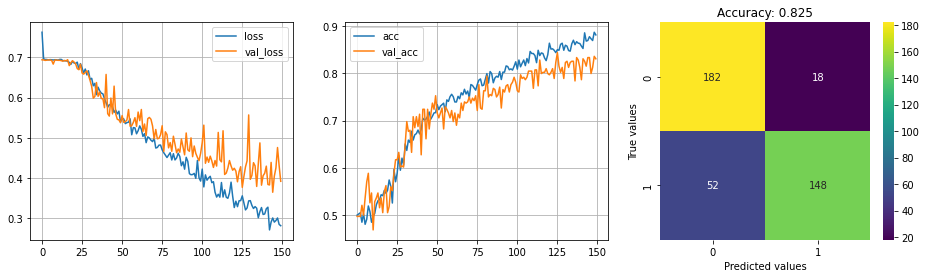

In [76]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.001),
        dense_layers = [512, 256, 128],
        dropout_rate = 0.5
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 150,
        verbose = 0
))

Nu får jag nog nöja mig här. Det ser ut som att nätet har mer att träna, men jag provade 120 epoker och då fick jag overfitting.

2022-05-03 10:10:09.640912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 10:10:13.966591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 10:16:28.503502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


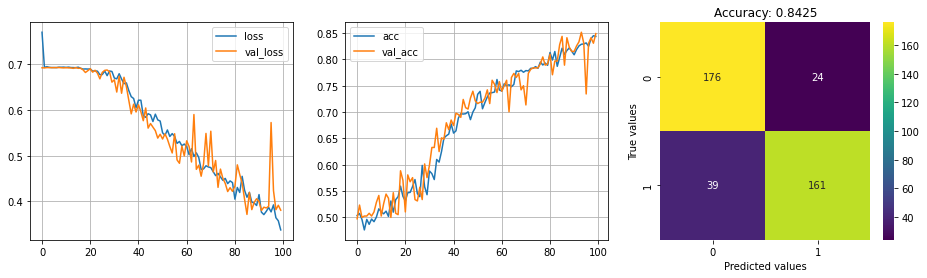

In [81]:
## Best net, trained with cropped images

fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.001),
        dense_layers = [512, 256, 128],
        dropout_rate = 0.2
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

Nu går vi över till dataset "tiny".

In [19]:
X_train = images["tiny_train"]
X_val = images["tiny_val"]
X_test = images["tiny_test"]
y_train = labels["tiny_train"]
y_val = labels["tiny_val"]
y_test = labels["tiny_test"]

Eftersom nätet presterade ganska dåligt på dataset small utan augmentering så kan man tänka att detta kommer bli en utmaning. Vi testar med grundinställningarna, utan augmentering.

Resultat: Valideringen visar att nätet är tydligt övertränat och klassificerar ungefär lika bra som en binär slumpgenerator.

2022-05-03 12:41:44.521391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 12:41:45.380785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 12:41:52.885138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


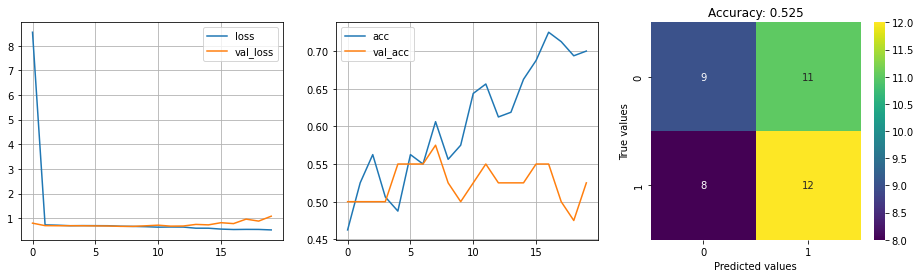

In [287]:
fit_eval((X_train, y_train),
    modelargs = dict(
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 20,
        verbose = 0
))

I ett desperat försök provar jag med att öka dropout och minska learning rate

Resultat: Jag ger upp.

2022-05-03 12:51:06.432394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 12:51:07.403621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 12:51:18.242114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


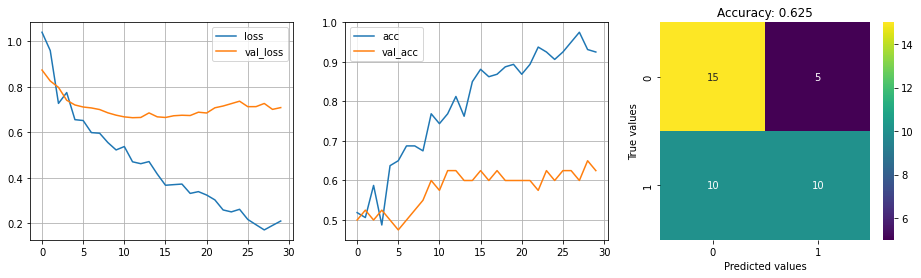

In [293]:
fit_eval((X_train, y_train),
    modelargs = dict(
        dropout_rate = 0.5,
        optimizer = Adam(learning_rate = 0.0001),
    ), fitargs = dict(
        validation_data = (X_val, y_val),
        epochs = 30,
        verbose = 0
))

Nu kör vi augmented!

In [20]:
BATCH_SIZE = 32

train_generator = train_image_generator.flow(X_train, y_train, batch_size = BATCH_SIZE)
val_generator = do_nothing_image_generator.flow(X_val, y_val, batch_size = BATCH_SIZE)

steps_per_epoch = int(len(X_train) / BATCH_SIZE)
validation_steps = int(len(X_val) / BATCH_SIZE)

steps_per_epoch, validation_steps

(5, 1)

Vi tar nätet som gav bäst resultat med det större datasetet

Resultat: Sista prediction med valideringsdatan är sannolikt bara tur, den följer inte val_acc-kurvan speciellt bra. Trots detta blev jag ändå positivt överraskad, det ser ut som att nätet klarar att nå en accuracy på närmare 0.8.

2022-05-03 12:53:28.959034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 12:53:33.422334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 13:00:13.033109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


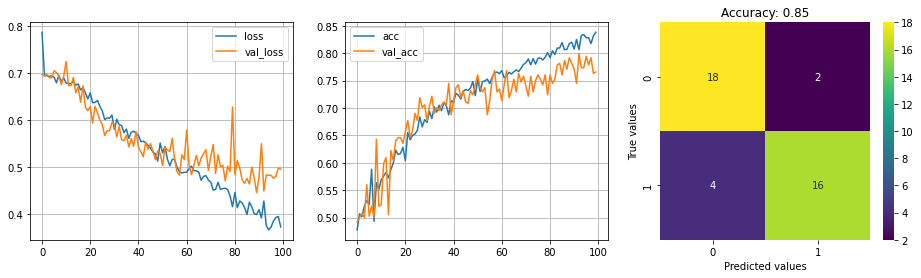

In [294]:
fit_eval((train_generator, None),
    modelargs = dict(
        optimizer = Adam(learning_rate = 0.001),
        dense_layers = [512, 256, 128],
        dropout_rate = 0.2
    ), fitargs = dict(
        steps_per_epoch = steps_per_epoch,
        validation_data = val_generator,
        validation_steps = validation_steps,
        epochs = 100,
        verbose = 0
))

**c)**

Jag har valt modellen som gav bäst resultat med augmenterad data och dataset "small". Det är spännande.

In [70]:
X_train = images["small_train"]
X_val = images["small_val"]
X_test = images["small_test"]
y_train = labels["small_train"]
y_val = labels["small_val"]
y_test = labels["small_test"]

In [72]:
X_train_small = np.concatenate([X_train, X_val])
y_train_small = np.concatenate([y_train, y_val])

BATCH_SIZE = 32

train_generator = train_image_generator.flow(X_train, y_train, batch_size = BATCH_SIZE)
val_generator = do_nothing_image_generator.flow(X_val, y_val, batch_size = BATCH_SIZE)

steps_per_epoch = int(len(X_train_small) / BATCH_SIZE)


train_small_generator = train_image_generator.flow(X_train_small, y_train_small, batch_size = BATCH_SIZE)

In [43]:
final_model = CNN_model(optimizer = Adam(learning_rate = 0.001), dense_layers = [512, 256, 128], dropout_rate = 0.2)
final_model.fit(train_small_generator, steps_per_epoch = steps_per_epoch, epochs = 100, verbose = 0)

Epoch 1/100


2022-05-03 19:39:55.924100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.7382 - acc: 0.5012

2022-05-03 19:39:59.544613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 4s 74ms/step - loss: 0.7382 - acc: 0.5012 - val_loss: 0.6915 - val_acc: 0.5208
Epoch 2/100
50/50 [==============================] - 4s 70ms/step - loss: 0.6927 - acc: 0.5131 - val_loss: 0.6906 - val_acc: 0.5521
Epoch 3/100
50/50 [==============================] - 4s 70ms/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6872 - val_acc: 0.6068
Epoch 4/100
50/50 [==============================] - 4s 69ms/step - loss: 0.6878 - acc: 0.5519 - val_loss: 0.6679 - val_acc: 0.5911
Epoch 5/100
50/50 [==============================] - 4s 70ms/step - loss: 0.6823 - acc: 0.5525 - val_loss: 0.6816 - val_acc: 0.5807
Epoch 6/100
50/50 [==============================] - 4s 69ms/step - loss: 0.6734 - acc: 0.5881 - val_loss: 0.6718 - val_acc: 0.5573
Epoch 7/100
50/50 [==============================] - 4s 71ms/step - loss: 0.6676 - acc: 0.6069 - val_loss: 0.6591 - val_acc: 0.5859
Epoch 8/100
50/50 [==============================] - 4s 71ms/step - loss: 0.6674 - acc: 

2022-05-03 20:00:56.201819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.78      0.86      0.81       250
           1       0.84      0.75      0.79       250

    accuracy                           0.80       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



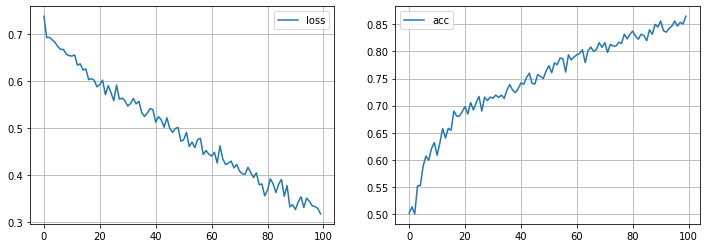

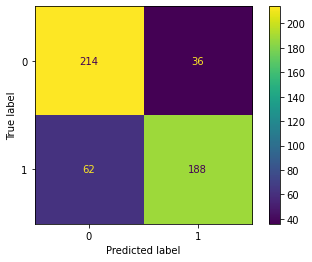

In [44]:
y_pred = final_model.predict(X_test)
plot_scoring(y_test, y_pred)

Jag är lite besviken, hade nog hoppats på att komma över 0.8 i accuracy eftersom valideringen under tidigare träning på bara träningsdatan ganska tydligt visade att det var möjligt.

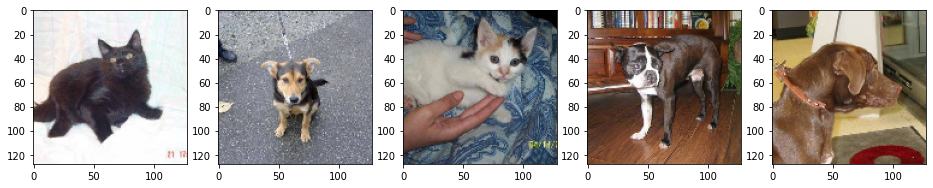

In [47]:
misclassified_indices = np.where(y_test != ((y_pred > 0.5) * 1).ravel())[0]
misclassified_samples = X_test[misclassified_indices]
plot_five_images(misclassified_samples[:5])

#### OBS! Här måste bilderna läsas in igen eftersom datan är skalad till 0-1, jag gjorde allt innan jag visste något om transfer-learning. Jag provade att skala om till 0-255 igen, men det verkade inte som att det fungerade så bra, av okänd anledning.

In [149]:
X_train = images["small_train"]
X_val = images["small_val"]
X_test = images["small_test"]
y_train = labels["small_train"]
y_val = labels["small_val"]
y_test = labels["small_test"]

In [150]:
from keras.applications.xception import preprocess_input

train_image_generator = ImageDataGenerator(
    rotation_range = 90,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = "nearest",
    preprocessing_function = preprocess_input
)

do_nothing_image_generator = ImageDataGenerator()

plot_generator = train_image_generator.flow(X_train[0:1], y_train[0:1], batch_size = 1)
plot_generator.next()[0].min(), plot_generator.next()[0].max()

(-0.9918855, 0.74411774)

In [151]:
X_train_small = np.concatenate([X_train, X_val])
y_train_small = np.concatenate([y_train, y_val])

BATCH_SIZE = 32

steps_per_epoch = int(len(X_train_small) / BATCH_SIZE)


train_small_generator = train_image_generator.flow(X_train_small, y_train_small, batch_size = BATCH_SIZE)

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import Xception

side = 128

xception_net = Xception(weights = "imagenet", include_top = False, input_shape = (side, side, 3))

xception_net.summary()


model = Sequential([
    xception_net,
    Flatten(),
    Dropout(0.2),
    Dense(1024, activation = "relu", kernel_initializer = "he_normal"),
    Dropout(0.2),
    Dense(512, activation = "relu", kernel_initializer = "he_normal"),
    Dropout(0.2),
    Dense(64, activation = "relu", kernel_initializer = "he_normal"),
    Dense(1, activation = "sigmoid")
])

for layer in xception_net.layers:
    layer.trainable = False

model.compile(optimizer = "adam", loss = "binary_crossentropy")

model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_11[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [169]:
model.fit(train_small_generator, steps_per_epoch = steps_per_epoch, epochs = 35, verbose = 1)

Epoch 1/35


2022-05-10 21:04:28.917041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 16s 209ms/step - loss: 1.6605
Epoch 2/35
62/62 [==============================] - 13s 208ms/step - loss: 0.5290
Epoch 3/35
62/62 [==============================] - 13s 204ms/step - loss: 0.3493
Epoch 4/35
62/62 [==============================] - 13s 208ms/step - loss: 0.2884
Epoch 5/35
62/62 [==============================] - 13s 212ms/step - loss: 0.2755
Epoch 6/35
62/62 [==============================] - 13s 212ms/step - loss: 0.2334
Epoch 7/35
62/62 [==============================] - 14s 228ms/step - loss: 0.2614
Epoch 8/35
62/62 [==============================] - 15s 236ms/step - loss: 0.2559
Epoch 9/35
62/62 [==============================] - 15s 248ms/step - loss: 0.2381
Epoch 10/35
62/62 [==============================] - 15s 239ms/step - loss: 0.2299
Epoch 11/35
62/62 [==============================] - 16s 250ms/step - loss: 0.2252
Epoch 12/35
62/62 [==============================] - 15s 244ms/step - loss: 0.2332
Epoch 13/35
62/62 [=====

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       250
           1       0.98      0.95      0.96       250

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



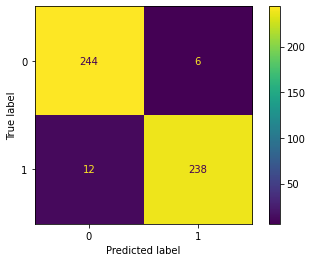

In [171]:

y_pred = model.predict(preprocess_input(X_test))
plot_scoring(y_test, y_pred)

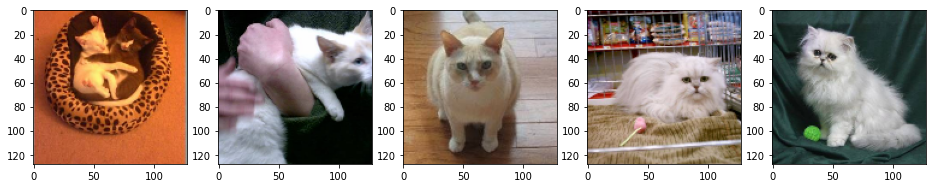

In [182]:
misclassified_indices = np.where(y_test != ((y_pred > 0.5) * 1).ravel())[0]
misclassified_samples = X_test[misclassified_indices]

plot_five_images(misclassified_samples[:5])

In [180]:
misclassified_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18